# INFO 2950 Project

### Authors: Teddy Klausner, Spencer Pettee, Sasha Miranda, and Ben Polson

## Hypothesis:

## Data Collection:

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load data
data = pd.read_csv("3i-index-data.csv",  encoding='latin-1')
data2 = pd.read_csv("annual-food-expenditure-per-person-vs-gdp-per-capita.csv",  encoding='latin-1')

In [2]:
data.head()

,ISO,Country/Group,1.1.1) Internet users / % of households,1.1.2) Fixed-line broadband subscribers / Per 100 inhabitants,1.1.3) Mobile subscribers / Per 100 inhabitants,1.1.4) Gender gap in internet access / % difference,1.1.5) Gender gap in mobile phone access / % difference,1.2.1) Average fixed broadband upload speed / Kbps,1.2.2) Average fixed broadband download speed / Kbps,1.2.3) Average fixed broadband latency / ms,...,BG15) Internet users (population) / Millions,BG16) Offline population / Millions,BG17) Internet access gender gap / Difference in percentage points,BG18) Mobile phone access gender gap / Difference in percentage points,BG19) Internet users (percent of population) / % of population,BG20) Male internet users / % of male population,BG21) Female internet users / % of female population,BG22) Male mobile phone subscribers / % of male population,BG23) Female mobile phone subscribers / % of female population,BG24) Total fixed line broadband subscribers / Number of subscriptions
0,DZ,Algeria,74.4,7.26,121.9,21.7,7.3,2090.0,3990.0,64.0,...,25.16,17.07,13.0,6.0,59.6,60.0,47.0,82.0,76.0,3063835.0
1,AR,Argentina,75.9,19.10,130.0,-5.7,-3.6,7960.0,33960.0,31.0,...,32.64,11.29,-4.0,-3.0,74.3,70.0,74.0,83.0,86.0,8473655.0
2,AU,Australia,86.1,32.22,113.6,2.1,2.2,20030.0,42630.0,24.0,...,21.28,3.31,2.0,2.0,86.5,94.0,92.0,93.0,91.0,7922000.0
3,AT,Austria,88.8,28.35,123.5,2.2,-1.0,16920.0,55030.0,20.0,...,7.80,1.09,2.0,-1.0,87.7,91.0,89.0,96.0,97.0,2521000.0
4,AZ,Azerbaijan,78.2,18.20,103.9,15.0,11.5,23490.0,21200.0,31.0,...,7.94,2.01,12.0,11.0,79.8,80.0,68.0,96.0,85.0,1810474.0


In [3]:
data['4.2.1) Privacy regulations / Qualitative rating 0-2, 2=best'].corr(data['1.1.1) Internet users / % of households'])

0.45332724160275384

In [4]:
for c in data:
    print(c)

ISO
Country/Group
1.1.1) Internet users / % of households
1.1.2) Fixed-line broadband subscribers / Per 100 inhabitants
1.1.3) Mobile subscribers / Per 100 inhabitants
1.1.4) Gender gap in internet access / % difference
1.1.5) Gender gap in mobile phone access / % difference
1.2.1) Average fixed broadband upload speed / Kbps
1.2.2) Average fixed broadband download speed / Kbps
1.2.3) Average fixed broadband latency / ms
1.2.4) Average mobile upload speed / Kbps
1.2.5) Average mobile download speed / Kbps
1.2.6) Average mobile latency / ms
1.2.7) Bandwidth capacity / Bit/s per Internet user
1.3.1) Network coverage (min. 2G) / % of population
1.3.2) Network coverage (min. 3G) / % of population
1.3.3) Network coverage (min. 4G) / % of population
1.3.4) 5G deployment / Qualitative rating 0-2, 2=best
1.3.5) Government initiatives to make Wi-Fi available / Qualitative rating 0-2, 2=best
1.3.6) Private sector initiatives to make Wi-Fi available / Qualitative rating 0-2, 2=best
1.3.7) Internet

(array([ 2.,  5.,  6.,  7., 10.,  5.,  5.,  2.,  3.,  3.,  3.,  5.,  1.,
         3.,  6.,  9., 12., 16.,  7.,  9.]),
 array([  0.3  ,   5.285,  10.27 ,  15.255,  20.24 ,  25.225,  30.21 ,
         35.195,  40.18 ,  45.165,  50.15 ,  55.135,  60.12 ,  65.105,
         70.09 ,  75.075,  80.06 ,  85.045,  90.03 ,  95.015, 100.   ]),
 <a list of 20 Patch objects>)

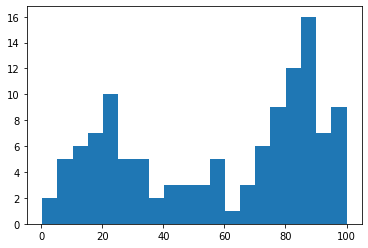

In [5]:
plt.hist(data['1.1.1) Internet users / % of households'], bins=20)

(array([ 3.,  9.,  7.,  8., 15., 11., 21., 14., 17.,  4.,  2.,  4.,  0.,
         3.,  1.]),
 array([34.        , 38.13333333, 42.26666667, 46.4       , 50.53333333,
        54.66666667, 58.8       , 62.93333333, 67.06666667, 71.2       ,
        75.33333333, 79.46666667, 83.6       , 87.73333333, 91.86666667,
        96.        ]),
 <a list of 15 Patch objects>)

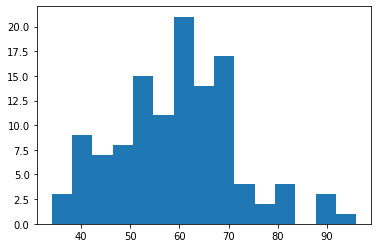

In [6]:
plt.hist(data['3.2.7) Value of e-Commerce / %'], bins=15)

In [8]:
#plt.scatter(data['4.2.2) Trust in online privacy / %'],data[], alpha=.5)

In [ ]:
#data['4.2.2) Trust in online privacy / %'].corr(data[''])

In [9]:
for c in data:
    col = data[c]
    print(col.describe(), '\n\n')

count     118
unique    118
top        DK
freq        1
Name: ISO, dtype: object 


count           119
unique          119
top       Nicaragua
freq              1
Name: Country/Group, dtype: object 


count    119.000000
mean      58.017353
std       31.108138
min        0.300000
25%       24.950000
50%       67.700000
75%       85.900000
max      100.000000
Name: 1.1.1) Internet users / % of households, dtype: float64 


count    119.000000
mean      14.896832
std       13.869953
min        0.030000
25%        1.655000
50%       10.936000
75%       27.840000
max       44.770000
Name: 1.1.2) Fixed-line broadband subscribers / Per 100 inhabitants, dtype: float64 


count    119.000000
mean     106.683218
std       25.049091
min       37.200000
25%       95.800000
50%      115.000000
75%      129.950000
max      130.000000
Name: 1.1.3) Mobile subscribers / Per 100 inhabitants, dtype: float64 


count    119.000000
mean      13.117025
std       15.939568
min      -14.000000
25%        2.

Name: BG9) Percentage of schools with Internet access / % of schools, dtype: float64 


count    119.000000
mean       2.024092
std        0.409532
min        1.200000
25%        1.708500
50%        2.000000
75%        2.300000
max        3.100000
Name: BG10) Global Peace Index / Score, 1-5; 1 = best, dtype: float64 


count    119.000000
mean       5.659277
std        2.013887
min        1.900000
25%        3.800000
50%        5.800000
75%        7.200000
max        9.400000
Name: BG11) Democracy Index / Score, 0-10; 10 = best, dtype: float64 


count    119.000000
mean      45.363521
std       18.268157
min       16.000000
25%       32.000000
50%       41.000000
75%       58.000000
max       88.000000
Name: BG12) Corruption Perceptions Index / Score, 0-100; 100 = best, dtype: float64 


count    119.000000
mean       6.060504
std        1.269104
min        3.500000
25%        5.100000
50%        5.900000
75%        6.950000
max        8.500000
Name: BG13) EIU Business Environment Ran

In [22]:
new_colnames = [c[c.find(')') + 2:].lower() for c in data.columns]

In [23]:
new_colnames = [c.replace(' ', '_') for c in new_colnames]

In [24]:
new_colnames = [c[:c.find('/')] + '(' + c[c.find('/') + 2:] + ')' for c in new_colnames]

In [35]:
data.head()

,s(o),ountry(roup),internet_users_(%_of_households),fixed-line_broadband_subscribers_(per_100_inhabitants),mobile_subscribers_(per_100_inhabitants),gender_gap_in_internet_access_(%_difference),gender_gap_in_mobile_phone_access_(%_difference),average_fixed_broadband_upload_speed_(kbps),average_fixed_broadband_download_speed_(kbps),average_fixed_broadband_latency_(ms),...,internet_users_(population)_(millions),offline_population_(millions),internet_access_gender_gap_(difference_in_percentage_points),mobile_phone_access_gender_gap_(difference_in_percentage_points),internet_users_(percent_of_population)_(%_of_population),male_internet_users_(%_of_male_population),female_internet_users_(%_of_female_population),male_mobile_phone_subscribers_(%_of_male_population),female_mobile_phone_subscribers_(%_of_female_population),total_fixed_line_broadband_subscribers_(number_of_subscriptions)
0,DZ,Algeria,74.4,7.26,121.9,21.7,7.3,2090.0,3990.0,64.0,...,25.16,17.07,13.0,6.0,59.6,60.0,47.0,82.0,76.0,3063835.0
1,AR,Argentina,75.9,19.10,130.0,-5.7,-3.6,7960.0,33960.0,31.0,...,32.64,11.29,-4.0,-3.0,74.3,70.0,74.0,83.0,86.0,8473655.0
2,AU,Australia,86.1,32.22,113.6,2.1,2.2,20030.0,42630.0,24.0,...,21.28,3.31,2.0,2.0,86.5,94.0,92.0,93.0,91.0,7922000.0
3,AT,Austria,88.8,28.35,123.5,2.2,-1.0,16920.0,55030.0,20.0,...,7.80,1.09,2.0,-1.0,87.7,91.0,89.0,96.0,97.0,2521000.0
4,AZ,Azerbaijan,78.2,18.20,103.9,15.0,11.5,23490.0,21200.0,31.0,...,7.94,2.01,12.0,11.0,79.8,80.0,68.0,96.0,85.0,1810474.0


### Interesting Columns

- **Name: 1.1.4) Gender gap in internet access / % difference, dtype: float64**
- Name: 1.1.5) Gender gap in mobile phone access / % difference, dtype: float64
- Name: 1.2.7) Bandwidth capacity / Bit/s per Internet user, dtype: float64 
- **Name: 1.4.1) Urban electricity access / % of population, dtype: float64**
- **Name: 1.4.2) Rural electricity access / % of population, dtype: float64**
- **Name: 2.1.1) Smartphone cost (handset) / Score of 0-100, 100=most affordable, dtype: float64**
- Name: 2.2.1) Average revenue per user (ARPU, annualized) / USD, dtype: float64 
- Name: 3.1.1) Availability of basic information in the local language / Qualitative rating 0-3, 3=best, dtype: float64 
- Name: 4.1.1) Level of literacy / % of population, dtype: float64 
- **Name: 4.1.4) Level of web accessibility / Qualitative rating 0-4, 4=best, dtype: float64**
- Name: 4.2.1) Privacy regulations / Qualitative rating 0-2, 2=best, dtype: float64
- **Name: 4.2.2) Trust in online privacy / %, dtype: float64**
- Name: 4.3.5.1) Technology-neutrality policy for spectrum use / Qualitative rating 0-1, 1=best, dtype: float64 
- Name: BG1) Nominal GDP / USD billions, dtype: float64 
- **Name: BG7) Total electricity access / % of population, dtype: float64**
- Name: BG9) Percentage of schools with Internet access / % of schools, dtype: float64 
- Name: BG10) Global Peace Index / Score, 1-5; 1 = best, dtype: float64 
- Name: BG11) Democracy Index / Score, 0-10; 10 = best, dtype: float64 
- Name: BG15) Internet users (population) / Millions, dtype: float64 
- Name: BG16) Offline population / Millions, dtype: float64 
- **Name: BG17) Internet access gender gap / Difference in percentage points, dtype: float64**
- **Name: BG19) Internet users (percent of population) / % of population, dtype: float64**

In [36]:
data.rename(columns={"s(o)":"ISO", "ountry(roup)":"country_group"})
#hello

,ISO,country_group,internet_users_(%_of_households),fixed-line_broadband_subscribers_(per_100_inhabitants),mobile_subscribers_(per_100_inhabitants),gender_gap_in_internet_access_(%_difference),gender_gap_in_mobile_phone_access_(%_difference),average_fixed_broadband_upload_speed_(kbps),average_fixed_broadband_download_speed_(kbps),average_fixed_broadband_latency_(ms),...,internet_users_(population)_(millions),offline_population_(millions),internet_access_gender_gap_(difference_in_percentage_points),mobile_phone_access_gender_gap_(difference_in_percentage_points),internet_users_(percent_of_population)_(%_of_population),male_internet_users_(%_of_male_population),female_internet_users_(%_of_female_population),male_mobile_phone_subscribers_(%_of_male_population),female_mobile_phone_subscribers_(%_of_female_population),total_fixed_line_broadband_subscribers_(number_of_subscriptions)
0,DZ,Algeria,74.400,7.260,121.900,21.700,7.300,2090.000,3990.000,64.000,...,25.160,17.070,13.000,6.000,59.600,60.000,47.000,82.000,76.000,3.063835e+06
1,AR,Argentina,75.900,19.100,130.000,-5.700,-3.600,7960.000,33960.000,31.000,...,32.640,11.290,-4.000,-3.000,74.300,70.000,74.000,83.000,86.000,8.473655e+06
2,AU,Australia,86.100,32.220,113.600,2.100,2.200,20030.000,42630.000,24.000,...,21.280,3.310,2.000,2.000,86.500,94.000,92.000,93.000,91.000,7.922000e+06
3,AT,Austria,88.800,28.350,123.500,2.200,-1.000,16920.000,55030.000,20.000,...,7.800,1.090,2.000,-1.000,87.700,91.000,89.000,96.000,97.000,2.521000e+06
4,AZ,Azerbaijan,78.200,18.200,103.900,15.000,11.500,23490.000,21200.000,31.000,...,7.940,2.010,12.000,11.000,79.800,80.000,68.000,96.000,85.000,1.810474e+06
5,BH,Bahrain,97.500,11.570,130.000,0.200,-1.000,8010.000,27180.000,12.000,...,1.550,0.020,0.200,-1.000,98.600,98.700,98.500,99.000,100.000,1.816090e+05
6,BD,Bangladesh,6.800,6.330,97.300,55.600,19.500,28210.000,24950.000,21.000,...,23.950,135.730,20.000,17.000,15.000,36.000,16.000,87.000,70.000,1.022107e+07
7,BE,Belgium,87.300,39.220,103.400,2.100,0.000,16800.000,85230.000,19.000,...,10.180,1.300,2.000,0.000,88.700,94.000,92.000,99.000,99.000,4.502950e+06
8,BW,Botswana,45.700,1.780,130.000,32.300,2.300,9320.000,8340.000,60.000,...,1.040,1.170,20.000,2.000,47.000,62.000,42.000,87.000,85.000,4.004400e+04
9,BR,Brazil,74.900,14.880,98.800,-3.200,-3.800,25470.000,47750.000,20.000,...,140.230,67.610,-2.000,-3.000,67.500,63.000,65.000,80.000,83.000,3.117790e+07
